In [1]:
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


Now it's time to cluster the songs of the hot_songs and not_hot_songs databases according to the song's audio features. You will need to consider the following:

Are you going to use all the audio features? If not, which ones do you think to make more sense? What is the optimal number of clusters (for methods that need to know this beforehand)? What is the best distance to use? What clustering method provides better results? Does the clustering method need a transformer? Be aware that this process is extremely time-consuming!!! Therefore, when testing different options, save the models into your disk in order to be able to use the best model later. You don't want to retrain the best model again when you know what are the optimal parameters for each.

Add to the hot_songs and not_hot_songs databases a new column for each clustering method with the cluster membership of each song for each method.

In [2]:
pd.set_option('display.max_columns', None)

## Importing the datasets and concatenating


In [3]:
billboard100_final = pd.read_csv('billboard100_final.csv')

In [4]:
billboard100_final.head()

,song_id,title,author,dataset,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,H,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4
1,1rDQ4oMwGJI7B4tovsBOxc,First Class,Jack Harlow,H,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4
2,1PckUlxKqWQs3RlWXVBLw3,About Damn Time,Lizzo,H,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4
3,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Glass Animals,H,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4
4,6Zu3aw7FfjAF9WA0fA81Oq,Big Energy,Latto,H,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,audio_features,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182,4


In [5]:
billboard100_final.shape


(75, 21)

In [6]:
nothotsongs_final = pd.read_csv('nothotsongs_final.csv')

nothotsongs_final = nothotsongs_final.iloc[:, :21]

In [7]:
X = pd.concat([billboard100_final, nothotsongs_final], axis=0)

In [8]:
X.head()

,song_id,title,author,dataset,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,Title,Artist
0,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,H,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,NaN,NaN
1,1rDQ4oMwGJI7B4tovsBOxc,First Class,Jack Harlow,H,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4,NaN,NaN
2,1PckUlxKqWQs3RlWXVBLw3,About Damn Time,Lizzo,H,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4,NaN,NaN
3,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Glass Animals,H,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4,NaN,NaN
4,6Zu3aw7FfjAF9WA0fA81Oq,Big Energy,Latto,H,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,audio_features,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182,4,NaN,NaN


In [9]:
X.shape

(1949, 23)

## Dropping unnecessary columns

In [10]:
#X.drop(columns=['song_id','title', 'artist', 'dataset','type', 'uri', 'track_href', 'analysis_url', 'time_signature'], axis=1, inplace=True)

In [11]:
X.head()

,song_id,title,author,dataset,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,Title,Artist
0,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,H,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,NaN,NaN
1,1rDQ4oMwGJI7B4tovsBOxc,First Class,Jack Harlow,H,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4,NaN,NaN
2,1PckUlxKqWQs3RlWXVBLw3,About Damn Time,Lizzo,H,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4,NaN,NaN
3,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Glass Animals,H,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4,NaN,NaN
4,6Zu3aw7FfjAF9WA0fA81Oq,Big Energy,Latto,H,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,audio_features,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182,4,NaN,NaN


## Scaling features

In [12]:
features_clustering= ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','time_signature']

In [13]:
X[features_clustering]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303,4
1,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,173948,4
2,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,191822,4
3,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,238805,4
4,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,173182,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,0.695,0.295,9,-8.672,1,0.0609,0.8430,0.000002,0.0856,0.732,93.574,127960,4
1870,0.494,0.756,0,-8.492,1,0.0499,0.7330,0.005050,0.7600,0.949,86.895,136027,4
1871,0.534,0.803,10,-9.129,1,0.0743,0.7410,0.000061,0.3070,0.969,167.983,161560,4
1872,0.454,0.260,8,-13.193,0,0.0401,0.5390,0.000780,0.0675,0.598,174.322,324133,5


In [14]:
!ls scalers/

Der Befehl "ls" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [15]:
import pickle
import os

scaler = StandardScaler()
scaler.fit(X[features_clustering])
X_scaled = scaler.transform(X[features_clustering])

if ( os.path.isdir("scalers") == False ):
    os.mkdir("scalers")

filename = r"C:\Users\NON\Documents\ironhack\class\week6\day3\scalers\scaler.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X[features_clustering].columns)
display(X.head())
print()
display(X_scaled_df.head())

,song_id,title,author,dataset,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,Title,Artist
0,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,H,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,NaN,NaN
1,1rDQ4oMwGJI7B4tovsBOxc,First Class,Jack Harlow,H,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4,NaN,NaN
2,1PckUlxKqWQs3RlWXVBLw3,About Damn Time,Lizzo,H,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4,NaN,NaN
3,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Glass Animals,H,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4,NaN,NaN
4,6Zu3aw7FfjAF9WA0fA81Oq,Big Energy,Latto,H,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,audio_features,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182,4,NaN,NaN


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.122608,0.604681,0.239003,0.986266,-1.530703,0.067369,0.177081,-0.321004,0.676193,0.685308,1.905221,-0.996237,0.227633
1,2.319343,-0.158748,0.809157,0.769069,0.653294,0.976177,-0.910038,-0.327230,-0.461898,-0.675070,-0.471708,-0.925376,0.227633
2,1.881695,0.659211,1.379311,0.722741,-1.530703,0.261693,-0.655598,-0.327290,0.814144,0.926795,-0.401819,-0.734771,0.227633
3,1.405990,-0.331428,1.664388,0.560593,0.653294,0.826999,0.513587,-0.327249,-0.582030,0.158061,-1.399581,-0.233753,0.227633
4,2.509625,0.950041,1.664388,1.395043,-1.530703,1.211721,-0.820761,-0.327290,0.894615,1.293051,-0.506545,-0.933545,0.227633


In [16]:
#!chmod --------- rwx -> r -> 4, w->2  x ->1
#rwx -> 4+2+1=7
#r-- -> 4 = 4
#rw- -> 4+2 = 6
#chmod 477

In [17]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.949000e+03,1.949000e+03,1.949000e+03,1.949000e+03,1.949000e+03,1.949000e+03,1.949000e+03,1.949000e+03,1.949000e+03,1.949000e+03,1.949000e+03,1.949000e+03,1.949000e+03
mean,1.090314e-15,-5.746786e-16,-6.858433e-17,-3.494867e-16,8.282526e-16,-1.479633e-16,-1.711190e-16,1.629163e-17,1.631156e-16,2.165761e-16,1.715747e-16,-1.506121e-16,-2.982621e-16
std,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00
min,-2.767526e+00,-2.674381e+00,-1.471460e+00,-7.132052e+00,-1.530703e+00,-5.843033e-01,-9.972381e-01,-3.272905e-01,-9.820865e-01,-1.858358e+00,-2.999672e+00,-2.103675e+00,-8.196215e+00
25%,-6.934533e-01,-7.631287e-01,-9.013060e-01,-5.482840e-01,-1.530703e+00,-4.213852e-01,-8.805076e-01,-3.272842e-01,-5.803057e-01,-8.239873e-01,-7.442312e-01,-5.342377e-01,2.276326e-01
50%,1.058966e-02,9.118416e-02,-4.607455e-02,1.480000e-01,6.532944e-01,-3.036131e-01,-3.654480e-01,-3.266432e-01,-3.986709e-01,-8.342628e-02,-4.786476e-02,-1.837605e-01,2.276326e-01
75%,6.956045e-01,8.137147e-01,8.091569e-01,7.412722e-01,6.532944e-01,-3.862590e-02,7.093096e-01,-2.957982e-01,2.221063e-01,8.020271e-01,5.639817e-01,2.986709e-01,2.276326e-01
max,2.642822e+00,1.804354e+00,1.664388e+00,2.021835e+00,6.532944e-01,1.016240e+01,2.405572e+00,5.815566e+00,4.596286e+00,1.985315e+00,3.159846e+00,1.386732e+01,3.035582e+00


## Clustering the songs with K-Means

## Chosing K with elbow  and silhouette methods

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 32479.96159866132.
Iteration 1, inertia 22453.094993570714.
Iteration 2, inertia 21928.144169949905.
Iteration 3, inertia 21798.580204947688.
Iteration 4, inertia 21769.043903979713.
Iteration 5, inertia 21758.930125808096.
Iteration 6, inertia 21755.428772159496.
Iteration 7, inertia 21754.798267786326.
Iteration 8, inertia 21754.698883694564.
Converged at iteration 8: center shift 6.0118226875032374e-05 within tolerance 9.999999999999994e-05.
Initialization complete
Iteration 0, inertia 47513.54679160837.
Iteration 1, inertia 24428.62522018339.
Iteration 2, inertia 22975.64777304298.
Iteration 3, inertia 22160.895255419342.
Iteration 4, inertia 21870.823284856244.
Iteration 5, inertia 21788.3205795689.
Iteration 6, inertia 21766.45998476952.
Iteration 7, inertia 21759.34797260486.
Iteration 8, inertia 21757.39126473479.
Iteration 9, inertia 21756.549675105634.
Iteration 10, inertia 21755.61548768

Iteration 0, inertia 30980.215659447065.
Iteration 1, inertia 21542.08058339168.
Iteration 2, inertia 20754.33754077701.
Iteration 3, inertia 20537.64250205199.
Iteration 4, inertia 20438.233539214452.
Iteration 5, inertia 20371.096080415315.
Iteration 6, inertia 20337.356654839255.
Iteration 7, inertia 20317.38662429699.
Iteration 8, inertia 20305.685556754244.
Iteration 9, inertia 20296.746983963727.
Iteration 10, inertia 20286.77520342576.
Iteration 11, inertia 20280.861040998225.
Iteration 12, inertia 20277.42093779036.
Iteration 13, inertia 20274.673097665876.
Iteration 14, inertia 20272.775960270275.
Iteration 15, inertia 20270.400558454327.
Iteration 16, inertia 20269.02243907633.
Iteration 17, inertia 20268.656840180673.
Iteration 18, inertia 20268.438057383035.
Iteration 19, inertia 20268.19356570542.
Converged at iteration 19: center shift 2.596688459314992e-05 within tolerance 9.999999999999994e-05.
Initialization complete
Iteration 0, inertia 29531.537842074253.
Iteration 1

Iteration 8, inertia 19080.836942556638.
Iteration 9, inertia 19073.60747947243.
Iteration 10, inertia 19069.417530635186.
Iteration 11, inertia 19066.91035093608.
Iteration 12, inertia 19062.972647864393.
Iteration 13, inertia 19060.366136283268.
Iteration 14, inertia 19056.17474837963.
Iteration 15, inertia 19052.050744197193.
Iteration 16, inertia 19048.952445894585.
Iteration 17, inertia 19047.492648452906.
Iteration 18, inertia 19046.698722166002.
Iteration 19, inertia 19044.72490687379.
Iteration 20, inertia 19044.029429461363.
Iteration 21, inertia 19043.49745752968.
Iteration 22, inertia 19043.356608667993.
Converged at iteration 22: center shift 3.197755823679676e-05 within tolerance 9.999999999999994e-05.
Initialization complete
Iteration 0, inertia 26036.876329641505.
Iteration 1, inertia 20365.25115856241.
Iteration 2, inertia 19630.478405388043.
Iteration 3, inertia 19426.73406091514.
Iteration 4, inertia 19393.380865440577.
Iteration 5, inertia 19377.667859814184.
Iterati

Iteration 16, inertia 17830.714717887757.
Converged at iteration 16: center shift 4.598769801820783e-05 within tolerance 9.999999999999994e-05.
Initialization complete
Iteration 0, inertia 26354.83241836507.
Iteration 1, inertia 19436.67927329582.
Iteration 2, inertia 18992.752251498496.
Iteration 3, inertia 18610.075030845306.
Iteration 4, inertia 18391.760545864894.
Iteration 5, inertia 18274.096752083802.
Iteration 6, inertia 18181.37943315002.
Iteration 7, inertia 18127.506422783466.
Iteration 8, inertia 18095.848910139037.
Iteration 9, inertia 18077.5416176868.
Iteration 10, inertia 18070.64561453728.
Iteration 11, inertia 18066.35482641202.
Iteration 12, inertia 18059.864503854984.
Iteration 13, inertia 18051.81616896878.
Iteration 14, inertia 18049.312914267488.
Iteration 15, inertia 18048.386667734187.
Iteration 16, inertia 18048.040326164853.
Iteration 17, inertia 18047.33803155357.
Iteration 18, inertia 18046.99514144359.
Converged at iteration 18: center shift 8.941893879885

Iteration 7, inertia 17635.268241724356.
Iteration 8, inertia 17356.2881342467.
Iteration 9, inertia 16865.668292668117.
Iteration 10, inertia 16759.1960943623.
Iteration 11, inertia 16750.30675429868.
Iteration 12, inertia 16746.64979629911.
Iteration 13, inertia 16744.76339941055.
Iteration 14, inertia 16743.733811325932.
Iteration 15, inertia 16743.592776866455.
Iteration 16, inertia 16743.477495247505.
Iteration 17, inertia 16743.33142222823.
Converged at iteration 17: center shift 8.677122072139112e-05 within tolerance 9.999999999999994e-05.
Initialization complete
Iteration 0, inertia 24127.119265396963.
Iteration 1, inertia 19057.125460578285.
Iteration 2, inertia 18606.41515536667.
Iteration 3, inertia 18469.006740378187.
Iteration 4, inertia 18368.04136184207.
Iteration 5, inertia 18263.93628414449.
Iteration 6, inertia 18159.93909660011.
Iteration 7, inertia 18040.853797379594.
Iteration 8, inertia 17912.33727093573.
Iteration 9, inertia 17790.10945103568.
Iteration 10, inert

Initialization complete
Iteration 0, inertia 21373.713595276982.
Iteration 1, inertia 17251.34300097267.
Iteration 2, inertia 17010.907843148958.
Iteration 3, inertia 16753.490307944943.
Iteration 4, inertia 16453.492214073274.
Iteration 5, inertia 16159.084915350099.
Iteration 6, inertia 15933.366624954057.
Iteration 7, inertia 15890.078185591286.
Iteration 8, inertia 15865.182358526115.
Iteration 9, inertia 15842.464363044404.
Iteration 10, inertia 15807.208058413224.
Iteration 11, inertia 15745.709659175598.
Iteration 12, inertia 15646.800052919316.
Iteration 13, inertia 15612.835694106072.
Iteration 14, inertia 15602.91916862262.
Iteration 15, inertia 15599.068064272387.
Iteration 16, inertia 15595.100543394046.
Iteration 17, inertia 15592.888282634613.
Iteration 18, inertia 15591.641596458228.
Iteration 19, inertia 15591.239861788094.
Iteration 20, inertia 15591.150907565947.
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 22995.31900655

Iteration 0, inertia 24404.711072414386.
Iteration 1, inertia 17816.823753780332.
Iteration 2, inertia 17321.718929763658.
Iteration 3, inertia 17039.2855877613.
Iteration 4, inertia 16711.689586183144.
Iteration 5, inertia 16374.8396249217.
Iteration 6, inertia 16181.849134854709.
Iteration 7, inertia 16094.641745225028.
Iteration 8, inertia 16017.318724209596.
Iteration 9, inertia 15888.172801137029.
Iteration 10, inertia 15643.88808899734.
Iteration 11, inertia 15531.937662797673.
Iteration 12, inertia 15524.56004551136.
Iteration 13, inertia 15523.945759664675.
Iteration 14, inertia 15523.77393049758.
Iteration 15, inertia 15523.648493259534.
Converged at iteration 15: center shift 9.523569126417895e-05 within tolerance 9.999999999999994e-05.
Training a K-Means model with 8 clusters! 

Initialization complete
Iteration 0, inertia 20454.38546603224.
Iteration 1, inertia 16491.455788605825.
Iteration 2, inertia 15777.68619132261.
Iteration 3, inertia 15485.036394561688.
Iteration 4, 

Iteration 7, inertia 16121.774843867639.
Iteration 8, inertia 15940.768717483063.
Iteration 9, inertia 15897.53919914646.
Iteration 10, inertia 15869.132634327292.
Iteration 11, inertia 15848.653585401207.
Iteration 12, inertia 15837.590495021124.
Iteration 13, inertia 15828.656311176192.
Iteration 14, inertia 15813.941841138649.
Iteration 15, inertia 15798.21448414911.
Iteration 16, inertia 15786.956592012493.
Iteration 17, inertia 15776.360260375228.
Iteration 18, inertia 15760.644989732726.
Iteration 19, inertia 15740.739610794388.
Iteration 20, inertia 15710.335876502631.
Iteration 21, inertia 15636.564891823946.
Iteration 22, inertia 15448.062107035852.
Iteration 23, inertia 15229.2159559334.
Iteration 24, inertia 15127.279097583547.
Iteration 25, inertia 15104.765890856746.
Iteration 26, inertia 15101.874740196865.
Iteration 27, inertia 15098.770203128854.
Iteration 28, inertia 15097.795542083966.
Iteration 29, inertia 15097.54999104933.
Iteration 30, inertia 15097.486165756902.


Iteration 11, inertia 14296.310022474097.
Iteration 12, inertia 14295.010386330217.
Iteration 13, inertia 14294.499871707529.
Iteration 14, inertia 14293.67650028292.
Iteration 15, inertia 14292.937162074431.
Iteration 16, inertia 14292.694180398343.
Iteration 17, inertia 14292.445987388754.
Iteration 18, inertia 14292.321207760682.
Iteration 19, inertia 14292.281018683632.
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 20396.65549544349.
Iteration 1, inertia 15787.516643987783.
Iteration 2, inertia 15365.989959669796.
Iteration 3, inertia 15201.811061904416.
Iteration 4, inertia 15018.245506460213.
Iteration 5, inertia 14742.98752668123.
Iteration 6, inertia 14545.561046312048.
Iteration 7, inertia 14473.898117584878.
Iteration 8, inertia 14418.418245942523.
Iteration 9, inertia 14370.287081982726.
Iteration 10, inertia 14347.695123236324.
Iteration 11, inertia 14338.571733779234.
Iteration 12, inertia 14331.715772135833.
Iteration 13, iner

Iteration 1, inertia 15530.501836125488.
Iteration 2, inertia 14780.193678192783.
Iteration 3, inertia 14557.740039247117.
Iteration 4, inertia 14487.849782193338.
Iteration 5, inertia 14412.422343500888.
Iteration 6, inertia 14316.185861508711.
Iteration 7, inertia 14274.674810278695.
Iteration 8, inertia 14262.914379389262.
Iteration 9, inertia 14248.893809586538.
Iteration 10, inertia 14234.617026985925.
Iteration 11, inertia 14224.746962262743.
Iteration 12, inertia 14219.315255141713.
Iteration 13, inertia 14212.608445912627.
Iteration 14, inertia 14200.229381797953.
Iteration 15, inertia 14187.48111342568.
Iteration 16, inertia 14172.824968741155.
Iteration 17, inertia 14147.29555812845.
Iteration 18, inertia 14124.81950748837.
Iteration 19, inertia 14101.070226901586.
Iteration 20, inertia 14074.38935006049.
Iteration 21, inertia 14032.725102325196.
Iteration 22, inertia 13950.836278708168.
Iteration 23, inertia 13867.191053873803.
Iteration 24, inertia 13810.840991153458.
Itera

Iteration 0, inertia 20076.21484854676.
Iteration 1, inertia 15174.464617391626.
Iteration 2, inertia 14607.25238286961.
Iteration 3, inertia 14372.130796621383.
Iteration 4, inertia 14205.148314029684.
Iteration 5, inertia 14115.304225567683.
Iteration 6, inertia 14092.128759255047.
Iteration 7, inertia 14084.220065232295.
Iteration 8, inertia 14078.718251295977.
Iteration 9, inertia 14075.078918779569.
Iteration 10, inertia 14073.983901598955.
Iteration 11, inertia 14073.49082110027.
Iteration 12, inertia 14073.185619450662.
Iteration 13, inertia 14073.139754969789.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 20030.421603733455.
Iteration 1, inertia 14611.5153584139.
Iteration 2, inertia 14085.75686229281.
Iteration 3, inertia 13911.285843956202.
Iteration 4, inertia 13776.63030692342.
Iteration 5, inertia 13681.045157679158.
Iteration 6, inertia 13620.733092010963.
Iteration 7, inertia 13563.508482635498.
Iteration 8, inertia 13514.727

Training a K-Means model with 12 clusters! 

Initialization complete
Iteration 0, inertia 18555.71957921747.
Iteration 1, inertia 14314.959620151618.
Iteration 2, inertia 13781.767364880609.
Iteration 3, inertia 13587.56202256752.
Iteration 4, inertia 13484.044360424941.
Iteration 5, inertia 13417.567982662218.
Iteration 6, inertia 13338.541649364985.
Iteration 7, inertia 13290.874906556432.
Iteration 8, inertia 13261.157620160131.
Iteration 9, inertia 13236.515076808568.
Iteration 10, inertia 13204.762191953025.
Iteration 11, inertia 13181.18619445138.
Iteration 12, inertia 13170.008713529203.
Iteration 13, inertia 13166.931037104177.
Iteration 14, inertia 13160.574358480273.
Iteration 15, inertia 13159.173466641152.
Iteration 16, inertia 13158.150998840289.
Iteration 17, inertia 13156.74663764047.
Iteration 18, inertia 13153.948180350695.
Iteration 19, inertia 13152.026213473506.
Iteration 20, inertia 13150.176724197887.
Iteration 21, inertia 13147.99510670894.
Iteration 22, inertia 

Iteration 0, inertia 18557.998485961776.
Iteration 1, inertia 14467.215904198652.
Iteration 2, inertia 13828.781125248284.
Iteration 3, inertia 13583.889891660207.
Iteration 4, inertia 13505.9654228129.
Iteration 5, inertia 13442.325028497136.
Iteration 6, inertia 13364.786770159442.
Iteration 7, inertia 13304.302394170343.
Iteration 8, inertia 13252.676203316823.
Iteration 9, inertia 13216.546623794895.
Iteration 10, inertia 13204.553275668146.
Iteration 11, inertia 13195.717277600721.
Iteration 12, inertia 13189.265496015074.
Iteration 13, inertia 13182.654007425775.
Iteration 14, inertia 13173.732738466677.
Iteration 15, inertia 13161.562378346342.
Iteration 16, inertia 13156.648500736632.
Iteration 17, inertia 13150.809591331494.
Iteration 18, inertia 13146.744144480956.
Iteration 19, inertia 13144.336651058995.
Iteration 20, inertia 13143.163608133116.
Iteration 21, inertia 13142.287649923153.
Iteration 22, inertia 13142.205808499917.
Iteration 23, inertia 13142.147954160075.
Conv

Iteration 1, inertia 13488.779295741002.
Iteration 2, inertia 13078.266819324537.
Iteration 3, inertia 13001.552315317094.
Iteration 4, inertia 12976.339983866812.
Iteration 5, inertia 12967.350346590803.
Iteration 6, inertia 12961.744304103513.
Iteration 7, inertia 12954.459925837664.
Iteration 8, inertia 12940.451123600245.
Iteration 9, inertia 12930.115517117883.
Iteration 10, inertia 12924.105265572565.
Iteration 11, inertia 12919.063110301046.
Iteration 12, inertia 12914.503736411218.
Iteration 13, inertia 12910.873486348948.
Iteration 14, inertia 12904.794976513225.
Iteration 15, inertia 12896.370122811619.
Iteration 16, inertia 12883.112718316437.
Iteration 17, inertia 12870.002473376087.
Iteration 18, inertia 12852.598548107573.
Iteration 19, inertia 12829.513245407743.
Iteration 20, inertia 12808.932650642566.
Iteration 21, inertia 12796.663331704154.
Iteration 22, inertia 12785.35219589905.
Iteration 23, inertia 12780.164527249513.
Iteration 24, inertia 12775.168298276942.
It

Initialization complete
Iteration 0, inertia 16770.217063203952.
Iteration 1, inertia 13493.896569181947.
Iteration 2, inertia 13166.277458315462.
Iteration 3, inertia 13018.415101201985.
Iteration 4, inertia 12927.00154387262.
Iteration 5, inertia 12875.943645882111.
Iteration 6, inertia 12841.01103995456.
Iteration 7, inertia 12826.55359603037.
Iteration 8, inertia 12817.322282452977.
Iteration 9, inertia 12810.87973001775.
Iteration 10, inertia 12807.484772502512.
Iteration 11, inertia 12799.383079704083.
Iteration 12, inertia 12786.138713208597.
Iteration 13, inertia 12771.141386958752.
Iteration 14, inertia 12738.343213199134.
Iteration 15, inertia 12685.332392215565.
Iteration 16, inertia 12633.262589338156.
Iteration 17, inertia 12606.210103271284.
Iteration 18, inertia 12587.043199297135.
Iteration 19, inertia 12557.027944499316.
Iteration 20, inertia 12543.805030888081.
Iteration 21, inertia 12539.649344511601.
Iteration 22, inertia 12533.708253504732.
Iteration 23, inertia 12

Initialization complete
Iteration 0, inertia 16936.776634040056.
Iteration 1, inertia 13509.39003995013.
Iteration 2, inertia 12980.15212440191.
Iteration 3, inertia 12831.256633979236.
Iteration 4, inertia 12766.071570683833.
Iteration 5, inertia 12729.328679158241.
Iteration 6, inertia 12703.448883769288.
Iteration 7, inertia 12681.654713248701.
Iteration 8, inertia 12666.629005312618.
Iteration 9, inertia 12654.319581247175.
Iteration 10, inertia 12645.088218071749.
Iteration 11, inertia 12640.334498839733.
Iteration 12, inertia 12636.875609411345.
Iteration 13, inertia 12631.538483108703.
Iteration 14, inertia 12627.235790441613.
Iteration 15, inertia 12625.210350013009.
Iteration 16, inertia 12623.386310690654.
Iteration 17, inertia 12620.752187004678.
Iteration 18, inertia 12617.993260533241.
Iteration 19, inertia 12616.76714483992.
Iteration 20, inertia 12615.665247036657.
Iteration 21, inertia 12614.89232202394.
Iteration 22, inertia 12614.028451778513.
Iteration 23, inertia 12

Iteration 1, inertia 14257.99767090648.
Iteration 2, inertia 13628.96695669592.
Iteration 3, inertia 13157.995338879922.
Iteration 4, inertia 12878.897420224417.
Iteration 5, inertia 12750.690643907106.
Iteration 6, inertia 12668.93982780371.
Iteration 7, inertia 12603.64798874318.
Iteration 8, inertia 12556.25536949377.
Iteration 9, inertia 12517.679012316908.
Iteration 10, inertia 12499.34979473809.
Iteration 11, inertia 12491.682502355103.
Iteration 12, inertia 12486.332922696236.
Iteration 13, inertia 12478.77879998839.
Iteration 14, inertia 12474.137608105379.
Iteration 15, inertia 12470.90527860813.
Iteration 16, inertia 12469.750505898695.
Iteration 17, inertia 12469.166312307385.
Iteration 18, inertia 12468.791347371334.
Iteration 19, inertia 12468.64495231269.
Iteration 20, inertia 12468.529881587043.
Iteration 21, inertia 12468.474288508281.
Iteration 22, inertia 12468.244899851683.
Iteration 23, inertia 12467.494659908372.
Iteration 24, inertia 12467.274800003597.
Iteration 

Iteration 1, inertia 13575.950669209673.
Iteration 2, inertia 12930.802381093648.
Iteration 3, inertia 12515.579863122535.
Iteration 4, inertia 12300.350369634083.
Iteration 5, inertia 12194.495871678953.
Iteration 6, inertia 12118.253421916785.
Iteration 7, inertia 12002.881658779805.
Iteration 8, inertia 11949.993618544617.
Iteration 9, inertia 11941.285966949128.
Iteration 10, inertia 11935.754091575036.
Iteration 11, inertia 11930.371309401487.
Iteration 12, inertia 11925.400341511586.
Iteration 13, inertia 11921.731195765486.
Iteration 14, inertia 11917.245240108781.
Iteration 15, inertia 11914.724704542008.
Iteration 16, inertia 11913.801359215739.
Iteration 17, inertia 11912.474919270184.
Iteration 18, inertia 11911.998733760509.
Iteration 19, inertia 11911.787131962468.
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 17110.497932043454.
Iteration 1, inertia 13021.088510680062.
Iteration 2, inertia 12654.567675166301.
Iteration 3, iner

Iteration 1, inertia 12733.961280439415.
Iteration 2, inertia 12329.902381114829.
Iteration 3, inertia 12187.53606651843.
Iteration 4, inertia 12078.842244590443.
Iteration 5, inertia 11980.867119400751.
Iteration 6, inertia 11909.515102287503.
Iteration 7, inertia 11863.694555480819.
Iteration 8, inertia 11837.333291614232.
Iteration 9, inertia 11828.713196884202.
Iteration 10, inertia 11826.318539837443.
Iteration 11, inertia 11825.24055130543.
Iteration 12, inertia 11824.268788201585.
Iteration 13, inertia 11822.014547803657.
Iteration 14, inertia 11817.83682561338.
Iteration 15, inertia 11813.395973852777.
Iteration 16, inertia 11810.210726107056.
Iteration 17, inertia 11809.39594799085.
Iteration 18, inertia 11808.243257730963.
Iteration 19, inertia 11806.578688985559.
Iteration 20, inertia 11806.16923208882.
Iteration 21, inertia 11805.531813154299.
Iteration 22, inertia 11804.57323689546.
Iteration 23, inertia 11803.832443454095.
Iteration 24, inertia 11802.087391459312.
Iterati

Iteration 16, inertia 11800.673327905664.
Iteration 17, inertia 11800.380056879985.
Iteration 18, inertia 11799.541993936662.
Iteration 19, inertia 11799.328724663661.
Iteration 20, inertia 11799.198442305587.
Iteration 21, inertia 11799.162817701079.
Converged at iteration 21: strict convergence.
Training a K-Means model with 18 clusters! 

Initialization complete
Iteration 0, inertia 16349.319348176588.
Iteration 1, inertia 12646.62383291396.
Iteration 2, inertia 12142.220025444543.
Iteration 3, inertia 11986.581887736382.
Iteration 4, inertia 11897.096009485143.
Iteration 5, inertia 11835.309962186919.
Iteration 6, inertia 11782.575430327228.
Iteration 7, inertia 11727.558761082564.
Iteration 8, inertia 11687.617823346367.
Iteration 9, inertia 11669.850494369412.
Iteration 10, inertia 11659.999534124796.
Iteration 11, inertia 11647.05205668751.
Iteration 12, inertia 11636.19948315335.
Iteration 13, inertia 11632.028712118325.
Iteration 14, inertia 11628.283138605615.
Iteration 15, i

Initialization complete
Iteration 0, inertia 16202.966126800487.
Iteration 1, inertia 12400.938839206647.
Iteration 2, inertia 11914.473689713055.
Iteration 3, inertia 11758.522916073925.
Iteration 4, inertia 11705.3669028046.
Iteration 5, inertia 11669.433151268166.
Iteration 6, inertia 11652.592749576743.
Iteration 7, inertia 11635.450257095872.
Iteration 8, inertia 11625.063538761384.
Iteration 9, inertia 11619.2071534364.
Iteration 10, inertia 11613.435165644996.
Iteration 11, inertia 11609.132818377577.
Iteration 12, inertia 11604.864988172492.
Iteration 13, inertia 11598.886634220522.
Iteration 14, inertia 11594.936379874725.
Iteration 15, inertia 11593.604493233817.
Iteration 16, inertia 11592.615615888533.
Iteration 17, inertia 11590.725159857737.
Iteration 18, inertia 11587.430352650561.
Iteration 19, inertia 11585.287970392548.
Iteration 20, inertia 11583.659247052137.
Iteration 21, inertia 11580.3021628084.
Iteration 22, inertia 11577.465415991184.
Iteration 23, inertia 1157

Iteration 20, inertia 11289.411861936223.
Iteration 21, inertia 11281.491096502416.
Iteration 22, inertia 11275.51759620812.
Iteration 23, inertia 11269.630190687598.
Iteration 24, inertia 11262.282766765378.
Iteration 25, inertia 11255.65837345407.
Iteration 26, inertia 11247.311607702613.
Iteration 27, inertia 11242.152563022857.
Iteration 28, inertia 11237.939678845385.
Iteration 29, inertia 11235.02498165948.
Iteration 30, inertia 11231.60480049848.
Iteration 31, inertia 11230.046535840169.
Iteration 32, inertia 11228.986602676818.
Iteration 33, inertia 11228.446604768094.
Iteration 34, inertia 11227.785433751087.
Iteration 35, inertia 11227.489352167273.
Iteration 36, inertia 11227.340179365347.
Iteration 37, inertia 11227.003677835386.
Iteration 38, inertia 11226.94899937012.
Converged at iteration 38: strict convergence.
Initialization complete
Iteration 0, inertia 16624.757330715613.
Iteration 1, inertia 12544.676491761606.
Iteration 2, inertia 11929.11837508571.
Iteration 3, i

Iteration 17, inertia 11394.627348212409.
Iteration 18, inertia 11393.235967433617.
Iteration 19, inertia 11392.06833547237.
Iteration 20, inertia 11391.403364216436.
Iteration 21, inertia 11390.963169860677.
Iteration 22, inertia 11390.87501783964.
Iteration 23, inertia 11390.835354767309.
Converged at iteration 23: strict convergence.
Initialization complete
Iteration 0, inertia 15046.405614648174.
Iteration 1, inertia 12262.12481903257.
Iteration 2, inertia 11764.929486520274.
Iteration 3, inertia 11624.032207130342.
Iteration 4, inertia 11547.023205561649.
Iteration 5, inertia 11489.983513197589.
Iteration 6, inertia 11439.409837479861.
Iteration 7, inertia 11394.562798748746.
Iteration 8, inertia 11350.28534894754.
Iteration 9, inertia 11318.65048515155.
Iteration 10, inertia 11301.9859341156.
Iteration 11, inertia 11291.402133960328.
Iteration 12, inertia 11286.644795003618.
Iteration 13, inertia 11283.13247808962.
Iteration 14, inertia 11276.669089157323.
Iteration 15, inertia 1

Iteration 33, inertia 11333.803911904606.
Iteration 34, inertia 11330.93738258802.
Iteration 35, inertia 11327.625941461903.
Iteration 36, inertia 11325.065388246749.
Iteration 37, inertia 11323.87166374878.
Iteration 38, inertia 11323.159954854116.
Iteration 39, inertia 11321.63226460287.
Iteration 40, inertia 11320.412971562802.
Iteration 41, inertia 11319.672896193773.
Iteration 42, inertia 11318.075155468752.
Iteration 43, inertia 11315.021136897754.
Iteration 44, inertia 11313.955216508468.
Iteration 45, inertia 11313.712194794916.
Iteration 46, inertia 11313.677042052457.
Converged at iteration 46: strict convergence.


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

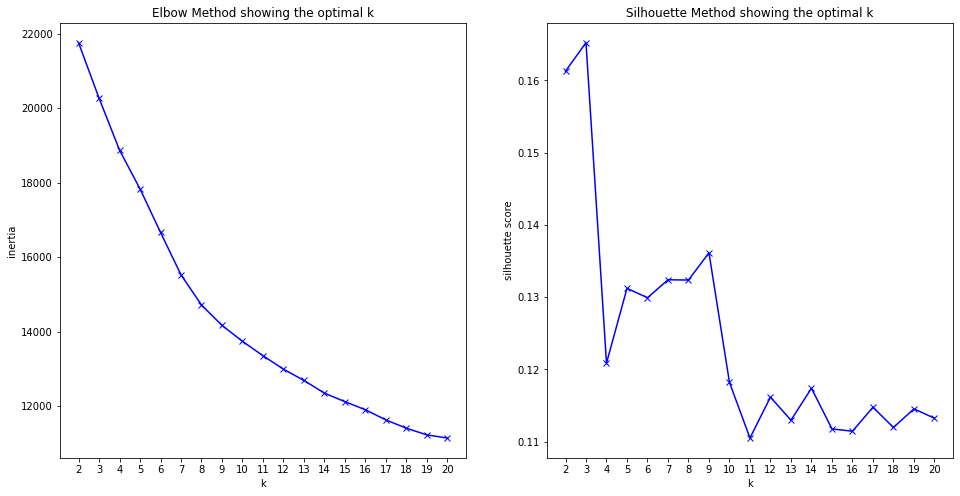

In [18]:
if ( os.path.isdir("models") == False ):
    os.mkdir("models")

K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)
    
    filename = r"C:\Users\NON\Documents\ironhack\class\week6\day3\models\kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

## Predicting with the best model


In [19]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 

In [20]:
best_model = load("models/kmeans_11.pickle")
best_model

KMeans(n_clusters=11, random_state=1234, verbose=1)

In [21]:
clusters = best_model.predict(X_scaled_df)

In [22]:
pd.Series(clusters).value_counts().sort_index()

0     294
1     224
2     245
3     120
4      54
5      23
6     261
7     277
8      82
9     134
10    235
dtype: int64

In [23]:
X["cluster"] = clusters
X.head()

,song_id,title,author,dataset,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,Title,Artist,cluster
0,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,H,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,NaN,NaN,0
1,1rDQ4oMwGJI7B4tovsBOxc,First Class,Jack Harlow,H,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4,NaN,NaN,2
2,1PckUlxKqWQs3RlWXVBLw3,About Damn Time,Lizzo,H,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4,NaN,NaN,0
3,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Glass Animals,H,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4,NaN,NaN,2
4,6Zu3aw7FfjAF9WA0fA81Oq,Big Energy,Latto,H,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,audio_features,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182,4,NaN,NaN,0


In [24]:
X.to_csv('X.csv')

In [25]:
X = pd.read_csv('X.csv')

In [26]:
X[X['cluster'] == 9].sample(15)

,Unnamed: 0,song_id,title,author,dataset,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,Title,Artist,cluster
1575,1500,31er9IGsfFbwqy1pH4aiTP,NaN,NaN,NH,0.541,0.401,0,-10.499,1,0.0365,0.57600,0.000000,0.1640,0.2400,152.943,audio_features,spotify:track:31er9IGsfFbwqy1pH4aiTP,https://api.spotify.com/v1/tracks/31er9IGsfFbw...,https://api.spotify.com/v1/audio-analysis/31er...,289160,3,I Have Nothing,Whitney Houston,9
939,864,0vFOzaXqZHahrZp6enQwQb,NaN,NaN,NH,0.468,0.536,11,-10.422,0,0.1440,0.02400,0.001990,0.2690,0.7850,126.256,audio_features,spotify:track:0vFOzaXqZHahrZp6enQwQb,https://api.spotify.com/v1/tracks/0vFOzaXqZHah...,https://api.spotify.com/v1/audio-analysis/0vFO...,382834,1,Money,Pink Floyd,9
807,732,74MhYN5UyyDx0W2cbTUZYo,NaN,NaN,NH,0.707,0.341,10,-7.387,1,0.0265,0.78700,0.002570,0.1620,0.4870,89.410,audio_features,spotify:track:74MhYN5UyyDx0W2cbTUZYo,https://api.spotify.com/v1/tracks/74MhYN5UyyDx...,https://api.spotify.com/v1/audio-analysis/74Mh...,240913,3,Pain and Misery,The Teskey Brothers,9
40,40,0oWraSo5ASJ0h1BEagTyEw,Hold My Hand,Lady Gaga,H,0.519,0.617,7,-4.287,1,0.0313,0.03870,0.000000,0.4010,0.2220,147.708,audio_features,spotify:track:0oWraSo5ASJ0h1BEagTyEw,https://api.spotify.com/v1/tracks/0oWraSo5ASJ0...,https://api.spotify.com/v1/audio-analysis/0oWr...,225300,3,NaN,NaN,9
335,260,2ZiRiPXE929bStanWOgVES,NaN,NaN,NH,0.476,0.479,11,-7.272,1,0.0348,0.60300,0.000023,0.1030,0.2190,79.346,audio_features,spotify:track:2ZiRiPXE929bStanWOgVES,https://api.spotify.com/v1/tracks/2ZiRiPXE929b...,https://api.spotify.com/v1/audio-analysis/2ZiR...,212907,3,I Don't Wanna Hurt,Anouk,9
995,920,2eD5bmknmcojiCxoKpvVTI,NaN,NaN,NH,0.219,0.430,9,-9.202,1,0.0309,0.82000,0.000044,0.1240,0.4950,180.050,audio_features,spotify:track:2eD5bmknmcojiCxoKpvVTI,https://api.spotify.com/v1/tracks/2eD5bmknmcoj...,https://api.spotify.com/v1/audio-analysis/2eD5...,216173,3,Calypso,John Denver,9
469,394,6r9WpbFiXEfFZHlPJSKbSr,NaN,NaN,NH,0.448,0.502,3,-7.352,1,0.0315,0.24800,0.000003,0.1080,0.2070,183.089,audio_features,spotify:track:6r9WpbFiXEfFZHlPJSKbSr,https://api.spotify.com/v1/tracks/6r9WpbFiXEfF...,https://api.spotify.com/v1/audio-analysis/6r9W...,265636,3,Liverpool Rain,Racoon,9
28,28,3WMj8moIAXJhHsyLaqIIHI,Something In The Orange,Zach Bryan,H,0.369,0.192,4,-12.151,0,0.0400,0.55500,0.000008,0.0954,0.1480,175.212,audio_features,spotify:track:3WMj8moIAXJhHsyLaqIIHI,https://api.spotify.com/v1/tracks/3WMj8moIAXJh...,https://api.spotify.com/v1/audio-analysis/3WMj...,228013,3,NaN,NaN,9
109,34,6Qyc6fS4DsZjB2mRW9DsQs,NaN,NaN,NH,0.315,0.715,11,-8.072,0,0.0362,0.00125,0.000008,0.0942,0.4970,155.925,audio_features,spotify:track:6Qyc6fS4DsZjB2mRW9DsQs,https://api.spotify.com/v1/tracks/6Qyc6fS4DsZj...,https://api.spotify.com/v1/audio-analysis/6Qyc...,289533,3,Iris,The Goo Goo Dolls,9
443,368,4HTWIrtqgWgIBxooUXSrLt,NaN,NaN,NH,0.326,0.509,7,-7.128,1,0.0246,0.50900,0.000071,0.1350,0.2390,95.934,audio_features,spotify:track:4HTWIrtqgWgIBxooUXSrLt,https://api.spotify.com/v1/tracks/4HTWIrtqgWgI...,https://api.spotify.com/v1/audio-analysis/4HTW...,238253,3,Auto Vliegtuug,Rowwen Hèze,9


In [27]:
clusters_filter = X.groupby(['cluster'])

In [28]:
clusters_filter.head()

,Unnamed: 0,song_id,title,author,dataset,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,Title,Artist,cluster
0,0,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,H,0.520,0.731,6,-5.338,0,0.0557,0.342000,0.001010,0.3110,0.6620,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,NaN,NaN,0
1,1,1rDQ4oMwGJI7B4tovsBOxc,First Class,Jack Harlow,H,0.905,0.563,8,-6.135,1,0.1020,0.025400,0.000010,0.1130,0.3240,106.998,audio_features,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4,NaN,NaN,2
2,2,1PckUlxKqWQs3RlWXVBLw3,About Damn Time,Lizzo,H,0.836,0.743,10,-6.305,0,0.0656,0.099500,0.000000,0.3350,0.7220,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4,NaN,NaN,0
3,3,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Glass Animals,H,0.761,0.525,11,-6.900,1,0.0944,0.440000,0.000007,0.0921,0.5310,80.870,audio_features,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4,NaN,NaN,2
4,4,6Zu3aw7FfjAF9WA0fA81Oq,Big Energy,Latto,H,0.935,0.807,11,-3.838,0,0.1140,0.051400,0.000000,0.3490,0.8130,106.017,audio_features,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182,4,NaN,NaN,0
5,5,29d0nY7TzCoi22XBqDQkiP,Running Up That Hill (A Deal With God),Kate Bush,H,0.625,0.533,10,-11.903,0,0.0596,0.659000,0.002660,0.0546,0.1390,108.296,audio_features,spotify:track:29d0nY7TzCoi22XBqDQkiP,https://api.spotify.com/v1/tracks/29d0nY7TzCoi...,https://api.spotify.com/v1/audio-analysis/29d0...,300840,4,NaN,NaN,7
6,6,1qEmFfgcLObUfQm0j1W2CK,Late Night Talking,Harry Styles,H,0.714,0.728,10,-4.595,1,0.0468,0.298000,0.000000,0.1060,0.9010,114.996,audio_features,spotify:track:1qEmFfgcLObUfQm0j1W2CK,https://api.spotify.com/v1/tracks/1qEmFfgcLObU...,https://api.spotify.com/v1/audio-analysis/1qEm...,177955,4,NaN,NaN,6
7,7,1IHWl5LamUGEuP4ozKQSXZ,Titi Me Pregunto,Bad Bunny,H,0.650,0.715,5,-5.198,0,0.2530,0.099300,0.000291,0.1260,0.1870,106.672,audio_features,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...,243717,4,NaN,NaN,4
8,8,3cBsEDNhFI9E82vPj3kvi3,Wasted On You,Morgan Wallen,H,0.505,0.657,11,-5.240,0,0.0318,0.373000,0.001070,0.1260,0.2520,196.000,audio_features,spotify:track:3cBsEDNhFI9E82vPj3kvi3,https://api.spotify.com/v1/tracks/3cBsEDNhFI9E...,https://api.spotify.com/v1/audio-analysis/3cBs...,178520,3,NaN,NaN,9
9,9,6Xom58OOXk2SoU711L2IXO,Moscow Mule,Bad Bunny,H,0.804,0.674,5,-5.453,0,0.0333,0.294000,0.000001,0.1150,0.2920,99.968,audio_features,spotify:track:6Xom58OOXk2SoU711L2IXO,https://api.spotify.com/v1/tracks/6Xom58OOXk2S...,https://api.spotify.com/v1/audio-analysis/6Xom...,245940,4,NaN,NaN,0


In [31]:
#X[(X['dataset'] == "N") & (X['cluster'] == user_cluster)].sample() dataset== H or NH - cluster==assigned cluster

In [32]:
#search_song_ids

# RECOMMANDATION 

In [68]:
hot_df = X[X.dataset == 'H']
nothot_df = X[X.dataset == 'NH']

In [84]:
hot_df = X[X.dataset == 'H']
nothot_df = X[X.dataset == 'NH']

In [83]:
hot100= pd.read_csv('billboard100_final.csv')

In [82]:
nothot100 = pd.read_csv('nothotsongs_final.csv')

In [41]:
X = pd.read_csv('X.csv')

In [42]:
import pickle

In [43]:
import scalers